In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Initial conditions

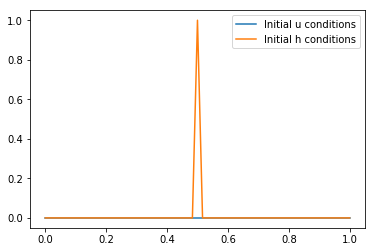

In [26]:
nx = 60 # number of points from x = 0 to x = 1
nt = 50

def initialconditions_spike(nx, nt, plot = True):
    x = np.linspace(0,1,nx+1) # we want the extra point at the boundary but in reality h[0] and h[nx] are equal
    midpoint = math.floor(math.floor(len(x)/2)/2)*2
    initialu = np.zeros(len(x)).astype(float)
    initialh = np.where(x == x[midpoint], 1, 0).astype(float)
    if plot == True:
        plt.clf()
        plt.ion()
        plt.plot(x, initialu, label = 'Initial u conditions')
        plt.plot(x, initialh, label = 'Initial h conditions')
        plt.legend(loc = 'best')
        plt.show()
    return initialu, initialh

initialu, initialh = initialconditions_spike(nx,nt)

## A-grid

In [30]:
def A_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, c = 0.1, Forcing = False):
    uOld = initialu.copy()
    hOld = initialh.copy()
    u = np.zeros_like(uOld)
    h = np.zeros_like(hOld)

    dt = (c*dx)/math.sqrt(g*H)

    for it in range(nt): 
        for y in range(1, nx-2):
            u[y] = uOld[y] - (c/(2*H))*(hOld[y+1] - hOld[y-1]) # forward in time and centred in space
            if Forcing == True:
                if y == midpoint:
                    h[y] = hOld[y] - (c/(2*g))*(u[y+1] - u[y-1]) + dt*math.sqrt(g*H)*math.sin(w*it/nt)# backward in time and centred in space
                else:
                    h[y] = hOld[y] - (c/(2*g))*(u[y+1] - u[y-1])

            elif Forcing == False:    
                h[y] = hOld[y] - (c/(2*g))*(u[y+1] - u[y-1]) # backward in time and centred in space
            else:    
                print("Error: Forcing must be true or false")
        u[0] = uOld[0] - (c/(2*H))*(hOld[1] - hOld[nx-2])
        u[nx-1] = uOld[nx-1] - (c/(2*H))*(hOld[0] - hOld[nx - 2])
        u[nx] = u[0].copy()
        h[0] = hOld[0] - (c/(2*g))*(u[0] - u[nx- 2])
        h[nx-1] = hOld[nx-1] - (c/(2*g))*(u[0] - u[nx- 2])
        h[nx] = h[0].copy()
        hOld = h.copy()
        uOld = u.copy()
    return u, h

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, u, label = 'u without forcing')
plt.plot(x, u_forcing, label = 'u with forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h, label = 'h without forcing')
plt.plot(x, h_forcing, label = 'h with forcing')
plt.legend(loc = 'best')
plt.show()



NameError: name 'u' is not defined

In [ ]:
uOld_forcing = initialu.copy()
hOld_forcing = initialh.copy()
u_forcing = np.zeros_like(uOld_forcing)
h_forcing = np.zeros_like(hOld_forcing)

g = 1 # gravitational acceleration constant
H = 1 # height

c = 0.1 # courant number root(g*H)(dt/dx)
w = 8


for it in range(int(nt/2)):   # because looking at t = 0.5
    for y in range(1, nx-2):
        u_forcing[y] = uOld_forcing[y] - (c/(2*H))*(hOld_forcing[y+1] - hOld_forcing[y-1]) # forward in time and centred in space
        if y == midpoint:
            h_forcing[y] = hOld_forcing[y] - (c/(2*g))*(u_forcing[y+1] - u_forcing[y-1]) + dt*math.sqrt(g*H)*math.sin(w*it/nt)# backward in time and centred in space
        else:
            h_forcing[y] = float(hOld_forcing[y] - (c/(2*g))*(u_forcing[y+1] - u_forcing[y-1]))

    # assuming periodic boundary conditions can define u and h on the boundaries
    u_forcing[0] = uOld_forcing[0] - (c/(2*H))*(hOld_forcing[1] - hOld_forcing[nx-2])
    u_forcing[nx-1] = uOld_forcing[nx-1] - (c/(2*H))*(hOld_forcing[1] - hOld_forcing[nx - 2])
    u_forcing[nx] = u_forcing[0].copy()
    h_forcing[0] = hOld_forcing[0] - (c/(2*g))*(u_forcing[1] - u_forcing[nx- 2])
    h_forcing[nx-1] = hOld_forcing[nx-1] - (c/(2*g))*(u_forcing[1] - u_forcing[nx- 2])
    h_forcing[nx] = h_forcing[0].copy()
    hOld_forcing = h_forcing.copy()
    uOld_forcing = u_forcing.copy()

u, h = A_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, Forcing = False)
u_forcing, h_forcing = A_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, Forcing = True)

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, u, label = 'u without forcing')
plt.plot(x, u_forcing, label = 'u with forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h, label = 'h without forcing')
plt.plot(x, h_forcing, label = 'h with forcing')
plt.legend(loc = 'best')
plt.show()



## C-grid

### NEED TO DEFINE VARIABLES AT TOP OF ALL FUNCTIONS

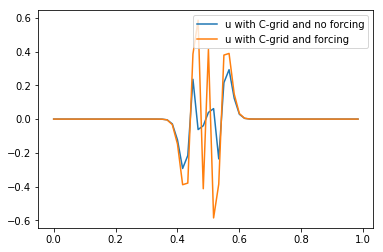

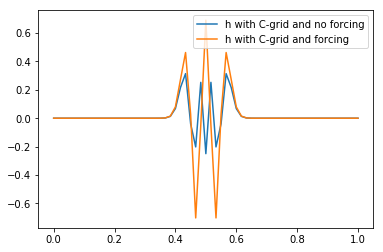

In [29]:
def C_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, c = 0.1, Forcing = False):
    uhalf = np.zeros(len(initialu)-1)
    
    # for a c-grid the velocity u is stagerred in the x-direction by half
    for i in range(0, len(initialu)-1):
        uhalf[i] = (initialu[i] + initialu[i + 1])/2
        
        # note that uhalf[i] = u_{i + 1/2}
        
    ####### NEED TO CHANGE THIS TO BE GETTING IT DIRECTLY FROM ANALYTICAL SOLUTION ####
    
    u_cgrid = np.zeros_like(uhalf)
    h_cgrid = np.zeros_like(initialh)
    
    uOld = uhalf.copy()
    hOld = initialh.copy()

    dx = 1/nx
    
    c = 0.1 # courant number root(g*H)(dt/dx)
    
    dt = (c*dx)/math.sqrt(g*H)
    

    for it in range(nt): 
        for y in range(1, nx-2):
            uhalf[y] = uOld[y] - (c*math.sqrt(g/H))*(hOld[y + 1] - hOld[y]) # forward in time and centred in space
            if Forcing == True:
                if y == midpoint:
                    h_cgrid[y] = hOld[y] - (c*math.sqrt(H/g))*(uhalf[y + 1] - uhalf[y-1]) + dt*math.sqrt(g*H)*math.sin(w*dt*it/2)# backward in time and centred in space
                else:
                    h_cgrid[y] = hOld[y] - (c*math.sqrt(g/H))*(uhalf[y] - uhalf[y-1])
            elif Forcing == False:    
                h_cgrid[y] = hOld[y] - (c*math.sqrt(g/H))*(uhalf[y] - uhalf[y-1]) 
            else:
                print("Error: Forcing must be true or false")
        
        uhalf[0] = uOld[0] - (c/(H))*(hOld[1] - hOld[0])
        uhalf[nx-1] = uOld[nx-1] - (c/(H))*(hOld[0] - hOld[nx-1])
        h_cgrid[0] = hOld[0] - (c/(g))*(uhalf[0] - uhalf[nx-2])
        h_cgrid[nx] = h_cgrid[0].copy()
        
        hOld = h_cgrid.copy()
        uOld = uhalf.copy()
    return uhalf, h_cgrid


uhalf, h_cgrid = C_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, Forcing = False)
uhalf_forcing, h_cgrid_forcing = C_grid(initialu, initialh, nx, nt, H = 1, g = 1, w = 8, Forcing = True)

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x[0:(len(x) -1)], uhalf, label = 'u with C-grid and no forcing')
plt.plot(x[0:(len(x) -1)], uhalf_forcing, label = 'u with C-grid and forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h_cgrid, label = 'h with C-grid and no forcing')
plt.plot(x, h_cgrid_forcing, label = 'h with C-grid and forcing')
plt.legend(loc = 'best')
plt.show()